<a href="https://colab.research.google.com/github/22f2001443/ideas_internship_notebook/blob/main/notebook_2_salePatterns/Visualizing_Time_Series_Dataset_Retail_Sales_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

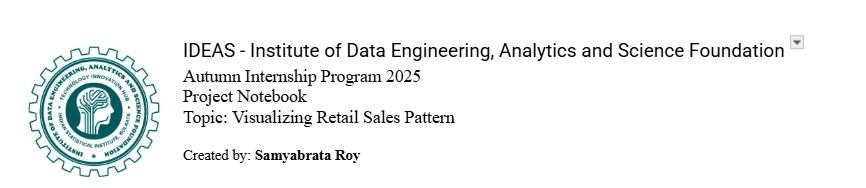

# Notebook: 2

👋 Welcome students!

In this journey, we’re going to take a dataset and slowly uncover the story it tells through visualization. Numbers by themselves can feel cold and endless, but once we turn them into visuals, they begin to speak.


---


# 📖 Introduction

Every time we walk into a store or shop online, we leave behind a trail of data — what we bought, when we bought it, how much we paid, and even how often we come back. At first glance, these transactions look like nothing more than rows in a spreadsheet: numbers, dates, and product codes.

But when we start to visualize this data, patterns emerge. We can see which products sell the most during festivals, how customer behavior changes across seasons, and which promotions actually drive sales. Suddenly, retail sales data isn’t just a collection of transactions — it’s a story about people, businesses, and the choices they make every day.

That’s the real power of visualization. It turns sales figures into insights that managers, marketers, and even students can understand at a glance. It’s not about making colorful charts — it’s about revealing trends, finding opportunities, and making smarter decisions.

In this notebook, we’ll take a retail sales dataset and learn how to explore and visualize it using Python. Some code will be provided, while other parts will be left for you to practice. By the end, you’ll see how visualization can transform raw sales data into meaningful insights — and how those insights help us understand the dynamics of retail businesses.


---





---

## 📝 Before We Dive In...



Before we start digging deep into the dataset, let’s pause for a moment and reflect.  
Here are a couple of questions for you to think about (and maybe discuss!):

1. **What do you understand by *Time-Series Data*?**  
   Time series data means data collected over time, at regular or irregular intervals, with time as one of the key variables.
   
   Likes,
   
   Daily stock prices of a company
   
   Hourly temperature readings
   
   Monthly sales revenue of a shop
   
   Yearly population growth

2. **Do you think choosing Python as our programming language for this analysis is a good decision?**  
     Yes I agree it. I think to analysis any data python as programe language is best choice and it is little easy for me because of in this internship programe we learn 'Basic Python(Data,Variables,Lists,Loop,Class,Foundation,OOPS,Numpy,Pandas).To run and analysis this given data set we have to use Pandas and Matplotlib.pyplot.
     

---

## ⚙️ Setting Things Up

Before we begin our analysis, we need to make sure we have the right tools.  
In the next coding cell, we’ll install and import the required Python packages that will help us explore and visualize the COVID-19 dataset.  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from datetime import datetime

---

## 📂 Loading Our Dataset

Now that our setup is ready, it’s time to bring in the data we’ll be working with.  
In the next coding cell, we’ll load the COVID-19 dataset directly from **Google Drive** (shared with public view access).  

Once the file is loaded, we’ll **print the first few rows** so that we can get a quick look at what the dataset contains before moving into analysis and visualization.  



In [ ]:

# Replace with your Google Drive file ID
file_id = "1gP1WQo8eZK5u3L5H61F8WHXrBLT-r6cW"

# Construct the download URL using the correct export format
url = f"https://drive.google.com/uc?export=download&id={file_id}"

try:
  # Read CSV directly into pandas
  df_sales = pd.read_csv(url)

  # Show first few rows
  print(df_sales.head())
except Exception as e:
    print(f"Error loading data: {e}")

   Transaction ID        Date Customer ID Product Category  Quantity  \
0               1  2023-11-24     CUST001           Beauty         3   
1               2  2023-02-27     CUST002         Clothing         2   
2               3  2023-01-13     CUST003      Electronics         1   
3               4  2023-05-21     CUST004         Clothing         1   
4               5  2023-05-06     CUST005           Beauty         2   

   Price per Unit  Total Amount  
0              50         150.0  
1             500        1000.0  
2              30          30.0  
3             500         500.0  
4              50         100.0  




---


## EDA including visualization

### Plot 1:

Monthly Revenue Over Time  

Visualizing monthly revenue helps us understand sales trends across the year.  
Are there peaks during certain months (like festivals or holidays)? Let’s find out.

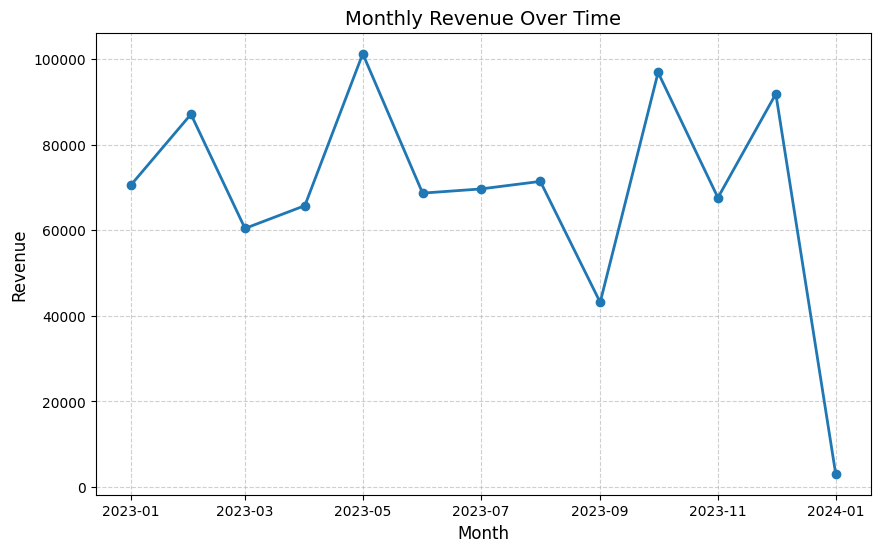

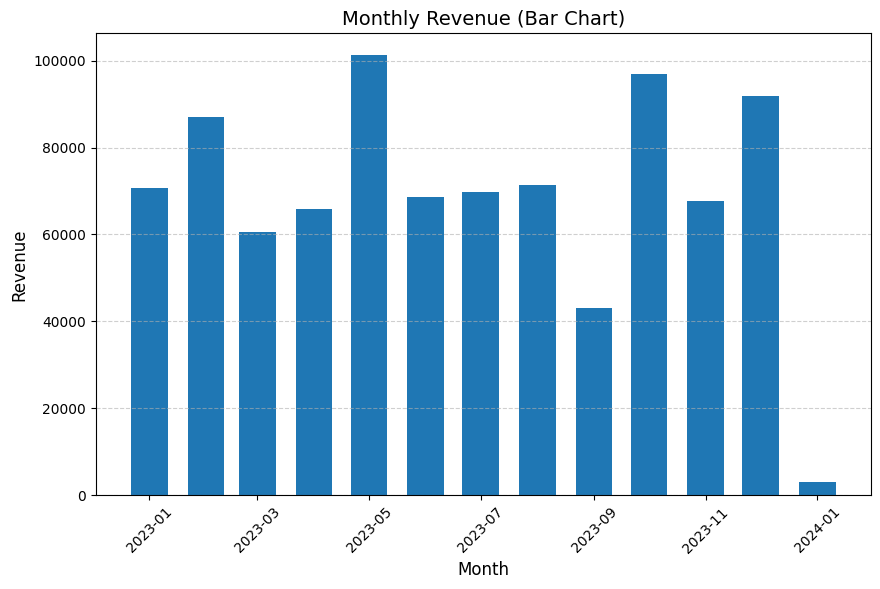

In [ ]:
# Ensure Date column is in datetime format
df_sales['Date'] = pd.to_datetime(df_sales['Date'])

# Group by Month-Year and calculate total revenue
monthly_revenue = df_sales.groupby(df_sales['Date'].dt.to_period('M'))['Total Amount'].sum()

# Convert PeriodIndex to Timestamp for plotting
monthly_revenue.index = monthly_revenue.index.to_timestamp()

# ---- Line Chart ----
plt.figure(figsize=(10,6))
plt.plot(monthly_revenue.index, monthly_revenue.values, marker='o', linewidth=2)
plt.title("Monthly Revenue Over Time", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# ---- Bar Chart ----
plt.figure(figsize=(10,6))
plt.bar(monthly_revenue.index, monthly_revenue.values, width=20)  # width=20 for month spacing
plt.title("Monthly Revenue (Bar Chart)", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.show()


Q. Can you interpret the above bar diagram?

Answer: The above 'Monthly Revenue(Bar Chart) it is clearly shows revenue per month From Januart,2023-January,2024

The x-axis shows months (from Jan 2023 to Jan 2024).

The y-axis shows revenue.

May 2023 the highest revenues, close to 100,000. February,October & December detectable high revenue, with revenue increasing between abobe 80,000 and below 100,000

January 2024 has a noticable drop almost neglisible.September 2023 has distinguishable dip, with revenue dropping close to 40,000.

January,Jun,July,August & November moradate little heih revenue lies letween 60,000 t0 70,000.


Q. What are your key takeaways?

Revenue Volatility: The monthly revenue is not consistent and shows considerable variation throughout the month.

Seasonal Peaks: There appear to be specific months with significantly higher revenue (e.g., May and November 2023), suggesting potential seasonal trends or successful marketing/sales initiatives during those periods.

Areas for Improvement: The lower revenue in certain months (e.g., September 2023) could indicate areas where further analysis is needed to understand the reasons for the dip and implement strategies for improvement.



---

###❓ Question:  

Plot the weekly revenue trend instead of monthly. What differences do you notice?


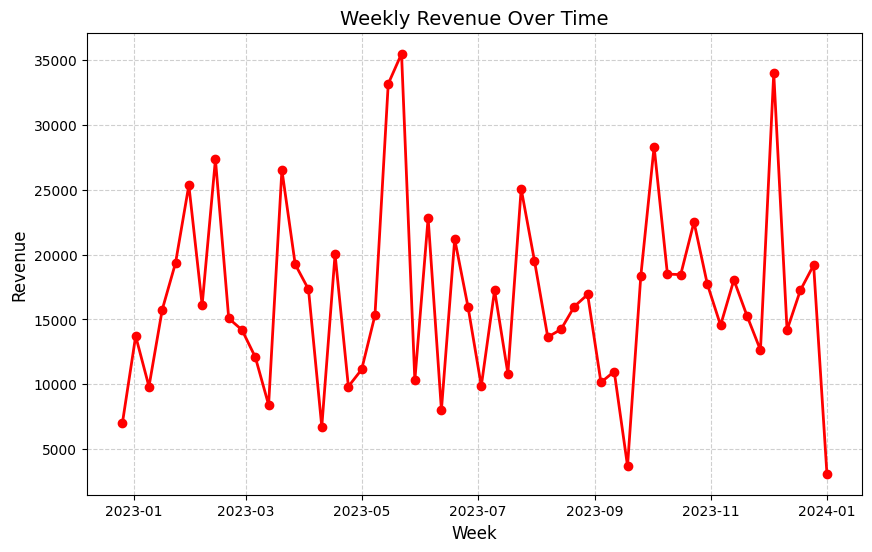

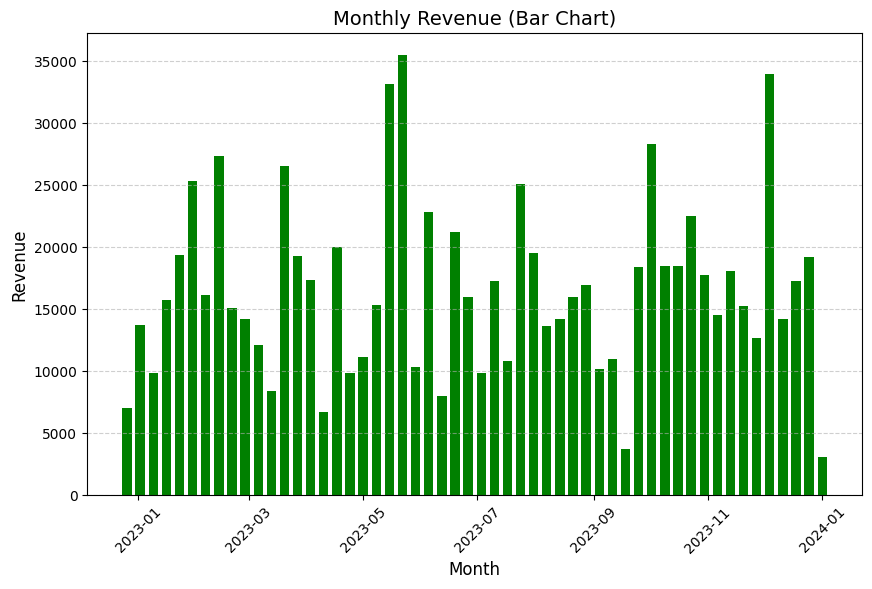

In [ ]:
# Ensure Date column is in datetime format
df_sales['Date'] = pd.to_datetime(df_sales['Date'])

# Group by Month-Year and calculate total revenue
weekly_revenue = df_sales.groupby(df_sales['Date'].dt.to_period('W'))['Total Amount'].sum()

# Convert PeriodIndex to Timestamp for plotting
weekly_revenue.index = weekly_revenue.index.to_timestamp()

# ---- Line Chart ----
plt.figure(figsize=(10,6))
plt.plot(weekly_revenue.index, weekly_revenue.values, marker='o',color='red', linewidth=2)
plt.title("Weekly Revenue Over Time", fontsize=14)
plt.xlabel("Week", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# ---- Bar Chart ----
plt.figure(figsize=(10,6))
plt.bar(weekly_revenue.index, weekly_revenue.values,color='green',width=5)  # width=5 for week spacing
plt.title("Monthly Revenue (Bar Chart)", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.show()




---


###Plot 2

Now well try to visualize the overall sales over all the product categories and infer about what product category is best selling.

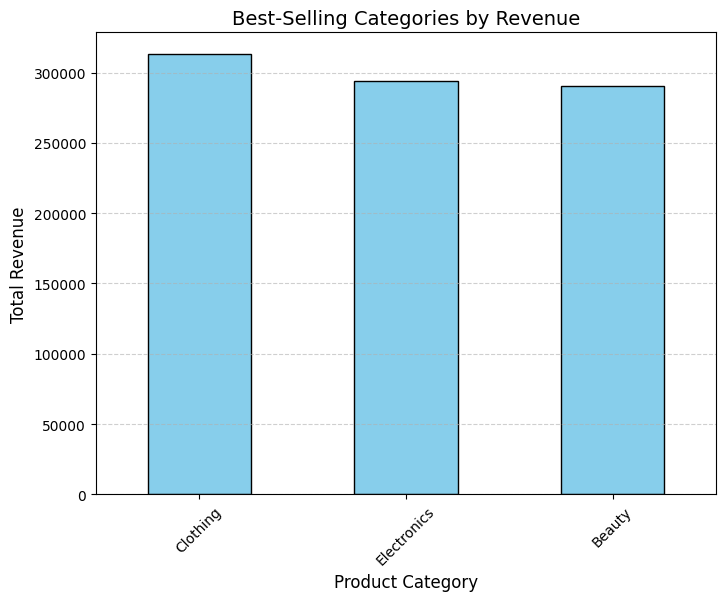

In [ ]:
# Group by Product Category and sum the revenue
category_revenue = df_sales.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(8,6))
category_revenue.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Best-Selling Categories by Revenue", fontsize=14)
plt.xlabel("Product Category", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.show()

Q. Now tell me which of the category has done the biggest contribution to the revenue?

Revenue contribution by category:
  Product Category  Total Amount
1         Clothing   312997.2701
2      Electronics   294194.6289
0           Beauty   290550.7257


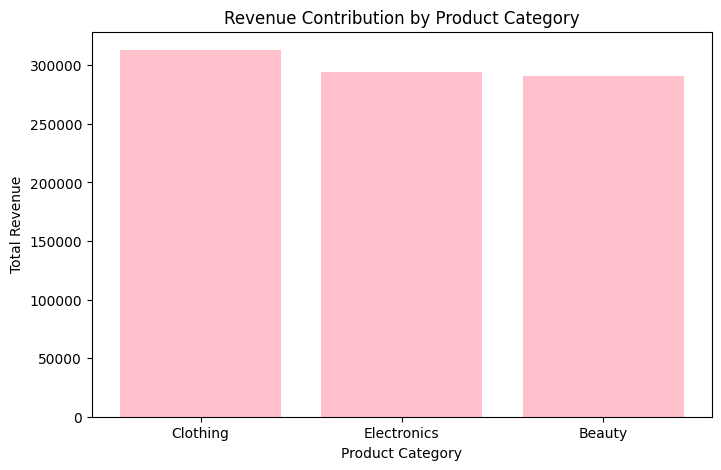

In [ ]:
# Group by Product Category and calculate total revenue
category_revenue = df_sales.groupby("Product Category")["Total Amount"].sum().reset_index()

# Sort in descending order
category_revenue = category_revenue.sort_values(by="Total Amount", ascending=False)

# Display result
print("Revenue contribution by category:")
print(category_revenue)

# Plot a bar chart
plt.figure(figsize=(8, 5))
plt.bar(category_revenue["Product Category"], category_revenue["Total Amount"],color="pink")
plt.title("Revenue Contribution by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Revenue")
plt.show()




---


###❓ Question:  
What if we want to visualize the **top 5 customers** by total spending?  
Try writing the code to generate a bar chart!  

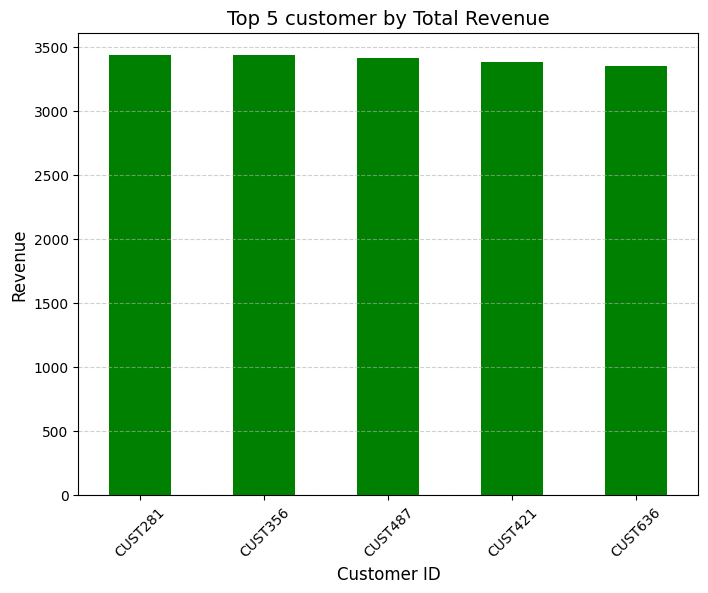

In [ ]:
# Group by Top-5 customer and sum
top_customers = df_sales.groupby('Customer ID')['Total Amount'].sum().sort_values(ascending=False).head(5)


# ---- Bar Chart ----
plt.figure(figsize=(8,6))
top_customers.plot(kind="bar", color="green")
plt.title("Top 5 customer by Total Revenue", fontsize=14)
plt.xlabel("Customer ID", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.show()




---



Calculate the average order value (AOV) per customer and plot them with a suitable diagram. Which customers have unusually high AOVs?

/tmp/ipython-input-1650341271.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  aov_per_customers = df_sales.groupby('Customer ID').apply(lambda x:x['Total Amount'].sum()/len(x)).sort_values(ascending=False)


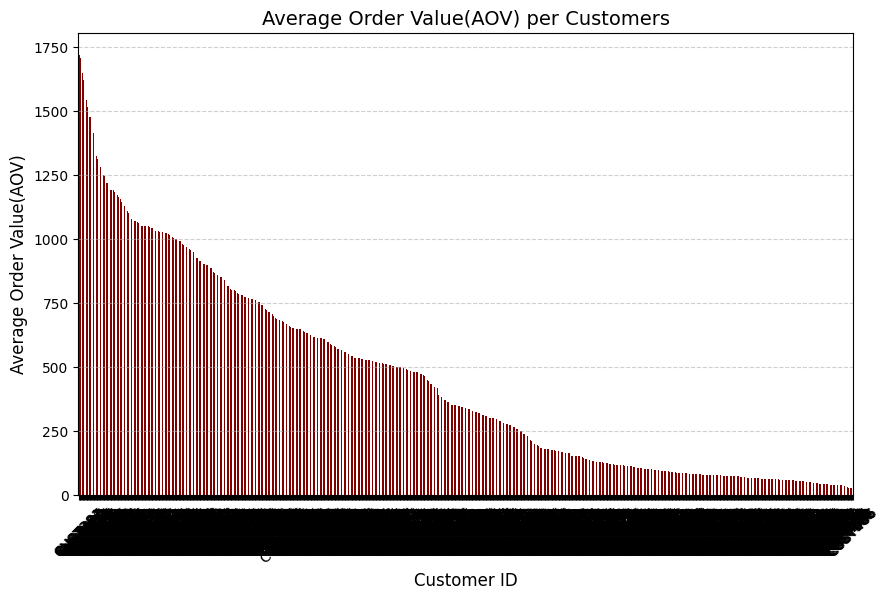

In [ ]:
# Calculatind the average order value (AOV) per customer and plotting
aov_per_customers = df_sales.groupby('Customer ID').apply(lambda x:x['Total Amount'].sum()/len(x)).sort_values(ascending=False)


# ---- Plot ----
plt.figure(figsize=(10,6))
aov_per_customers.plot(kind="bar", color="maroon")
plt.title("Average Order Value(AOV) per Customers", fontsize=14)
plt.xlabel("Customer ID", fontsize=12)
plt.ylabel("Average Order Value(AOV)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.show()




---


###Plot 3


After inspecting the contribution of each categories towards the total revenue we can say which categot=ry has contributed how much but it's necessary to get a relative quantification to compare between the categories' contribution.

So, we'll now see a donut chart of revenue contributions by each category

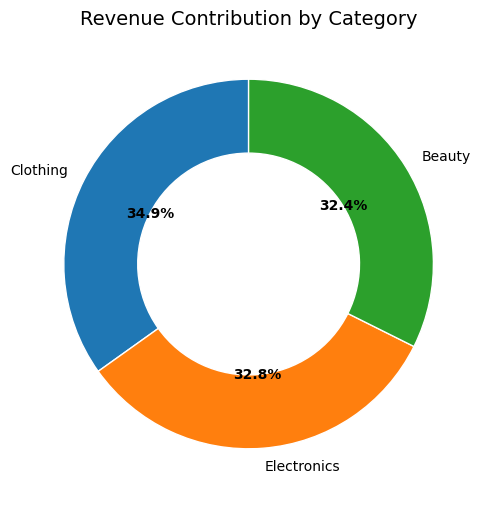

In [ ]:
# Donut chart
plt.figure(figsize=(8,6))
wedges, texts, autotexts = plt.pie(
    category_revenue['Total Amount'], # Select the 'Total Amount' column
    labels=category_revenue['Product Category'], # Use 'Product Category' for labels
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops=dict(width=0.4, edgecolor='w')
)

# Formatting
plt.setp(autotexts, size=10, weight="bold", color="black")
plt.title("Revenue Contribution by Category", fontsize=14)
plt.show()

Q. Was chosing donut chart a wise choice according to you?

Answer: The above donut chart is wise choosing according to me

1.It quickly shows how much each category (Clothing, Electronics, Beauty) contributes to the total revenue.

2.Since we want to compare categories against the whole, a donut chart highlights percentages effectively.


3.To understand revenue contribution it is better than Bar Chart. The hole in the middle makes it easier to label values (like percentages or totals) without cluttering the chart.


4.It's intuitive and attractive, making it easier for stakeholders to understand at a glance.


Q. What else we could have come up with apart from donut chart to server the same purpose?

Amswer:Apart from a donut chart, we could prefer

1.Pie chart~Similar to donut, shows contribution of each category to total revenue.


2.Bar chart~Makes it very easy to compare category revenues side by side.


3.Stacked bar chart~If you want to show contributions across multiple time periods along with totals.


4.Treemap~Uses nested boxes sized by value to represent proportions visually.



---

##Task:
Plot a cumulative revenue line chart. How does this help in understanding long-term sales growth?

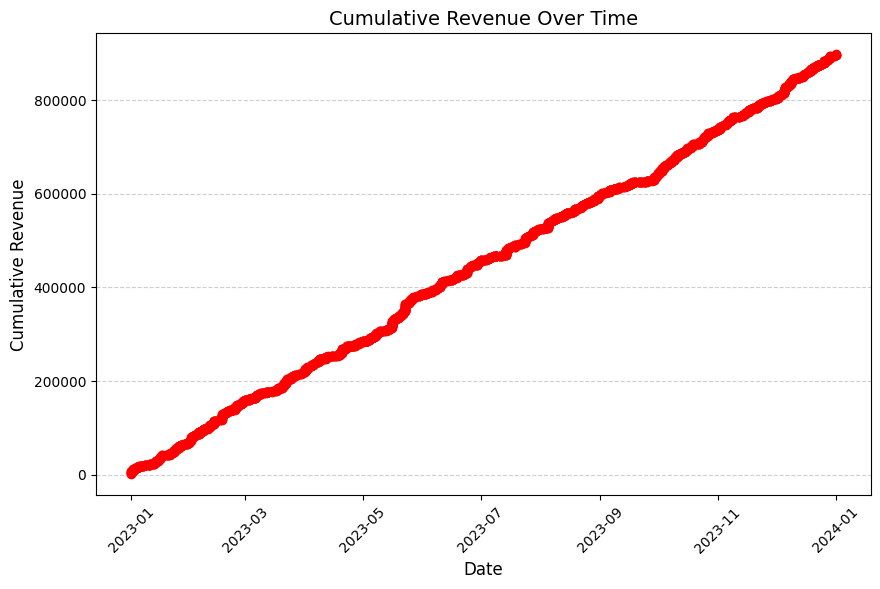

In [ ]:
#Cumulative revenue line chart
df_sales['Date'] = pd.to_datetime(df_sales['Date'])
df_sales = df_sales.sort_values('Date').reset_index(drop=True)


df_sales['Cumulative Revenue'] = df_sales['Total Amount'].cumsum()

plt.figure(figsize=(10,6))
plt.plot(df_sales['Date'], df_sales['Cumulative Revenue'],color='red', marker='o', linewidth=2)
plt.title("Cumulative Revenue Over Time", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Cumulative Revenue", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.show()



---
# Assisgnment

### Find a similar dataset of your choice and perform detailed EDA with proper visualization and infer about the dataset.


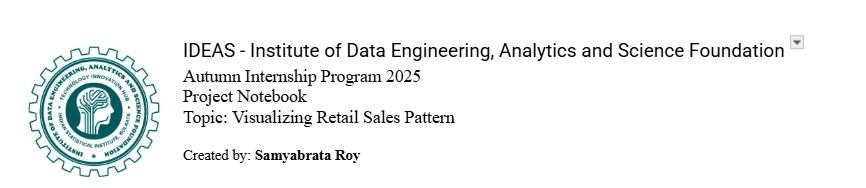

# Note Book-2
#Assisgment: Time Series DataSet Retail Seris Data of a Book-Shop

# Bookshop Sells From Main Branch to Sub Braches of Mega City Entire INDIA (January,2023- September,2025)

# 📖 Introduction

Every time we walk into Book Store or shop online, we leave behind a trail of data — what types of book wd bought, when we bought it through online or offline, how much we paid, how the transaction method and even how often we came back or any pronlem t
how the return policy or if fully refund . At first glance, these transactions look like nothing more than rows in a spreadsheet: numbers, dates, Order ID, Customer ID & ISBN(Book ID).

But when we start to visualize this data, patterns emerge. We can see which Books sells the most during year, how customer behavior changes across season(Academic Year), and which promotions actually drive sales. Suddenly, retail sales data isn’t just a collection of transactions — it’s a story about people, businesses, and the choices they make every day.

Here, for visualing the data set according to Tusk of our Internship Mentor , I have take a Retail book Shop Data Set (January,2023-September,2025). To visualize the Data set I use Python as a programming Language.

This project focuses on the analysis of bookshop sales data consisting of 2000 records, which include information such as book titles, categories, transaction details, quantities sold, and revenue generated.

###By examining this dataset, the project aims to:

1.Understand sales distribution across different book categories.

2.Identify revenue-driving products and categories contributing most to overall sales.

3.Analyze customer purchase behavior through time-series sales patterns.

4.Visualize key insights using graphs such as bar charts, line charts, and cumulative revenue trends.


## ⚙️ Setting Things Up

Before we begin our analysis, we need to make sure we have the right tools.  
In the next coding cell, we’ll install and import the required Python packages that will help us explore and visualize the BOOK-SHOP data set of Mega City Of INDIA  


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

---

## 📂 Loading My Dataset

In the next coding cell, I am  loading the BOOK-SHOP dataset directly from **Google Drive** (shared with public view access).  

Once the file is loaded, i am  **printing the first few rows** so that I can get a quick look at what the dataset contains before moving into analysis and visualization.  



In [ ]:
# Execute the cell to load the data
# Replace with My Google Drive file ID
file_id = "1daW8q0rdDHyBv-n7Bou0BaP2MFKWT_Hg"

# Construct the download URL using the correct export format
url = f"https://drive.google.com/uc?export=download&id={file_id}"

try:
  # Read CSV directly into pandas
  df_sales = pd.read_csv(url)

  # Show first few rows
  print(df_sales.head())
except Exception as e:
    print(f"Error loading data: {e}")

   OrderID        OrderDate CustomerID BookID                BookName  \
0  O100001  8/18/2023 23:40      C2124  B1102   Broken Dreams - Vol 3   
1  O100002   7/24/2023 0:44      C3496  B1071         Golden Promises   
2  O100003  11/16/2024 4:09      C4571  B1082  Golden Empire - Vol 10   
3  O100004  6/21/2023 22:03      C2876  B1116     Bright Empire (117)   
4  O100005   8/15/2024 0:56      C6111  B1021             Broken Song   

           Author BookCategory  PriceINR  Quantity  TotalINR PaymentType  \
0    Ananya Verma      Fantasy   1218.43         1   1218.43        Cash   
1  Siddharth Khan      Romance    945.55         1    945.55        Card   
2    Ananya Verma    Self-Help    257.87         1    257.87  NetBanking   
3    Deepak Gupta      Fantasy    948.94         2   1897.88        Card   
4      Rhea Mehta  Non-Fiction    197.79         2    395.58  NetBanking   

  StoreLocation  
0       Kolkata  
1        Mumbai  
2       Chennai  
3       Chennai  
4          Pun



---


## EDA including visualization

### Plot 1:

Monthly Revenue Over Time  

Visualizing monthly revenue helps us understand sales trends across the year.  
Are there peaks during certain months (like festivals or holidays)? Let’s find out.

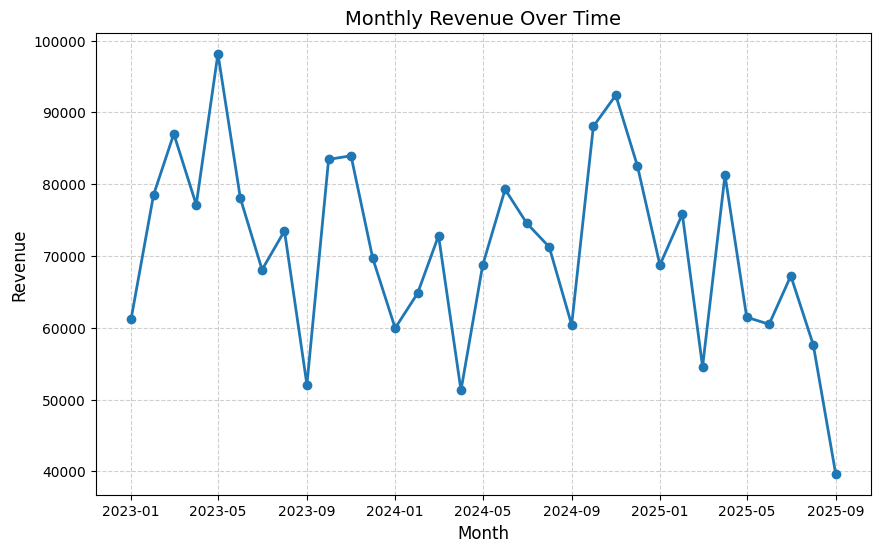

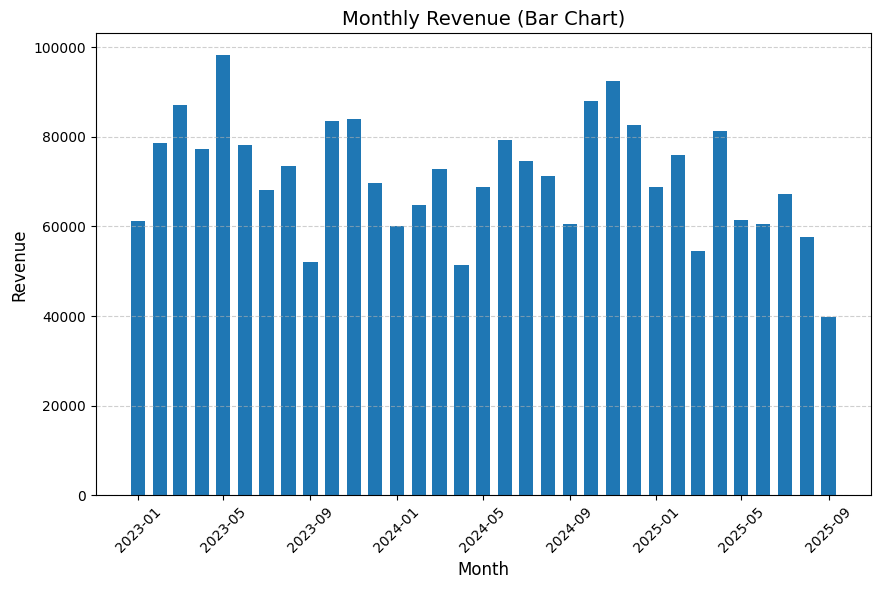

In [ ]:
# Ensure OrderDate column is in datetime format
df_sales['OrderDate'] = pd.to_datetime(df_sales['OrderDate'])

# Group by Month-Year and calculate total revenue
monthly_revenue = df_sales.groupby(df_sales['OrderDate'].dt.to_period('M'))['TotalINR'].sum()

# Convert PeriodIndex to Timestamp for plotting
monthly_revenue.index = monthly_revenue.index.to_timestamp()

# ---- Line Chart ----
plt.figure(figsize=(10,6))
plt.plot(monthly_revenue.index, monthly_revenue.values, marker='o', linewidth=2)
plt.title("Monthly Revenue Over Time", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# ---- Bar Chart ----
plt.figure(figsize=(10,6))
plt.bar(monthly_revenue.index, monthly_revenue.values, width=20)  # width=20 for month spacing
plt.title("Monthly Revenue (Bar Chart)", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.show()

### Plot :

Weekly Revenue Over Time  

Visualizing Weekly revenue helps us understand sales trends across the year.  
Are there peaks during certain weeks (like festivals or holidays)? Let’s find out.

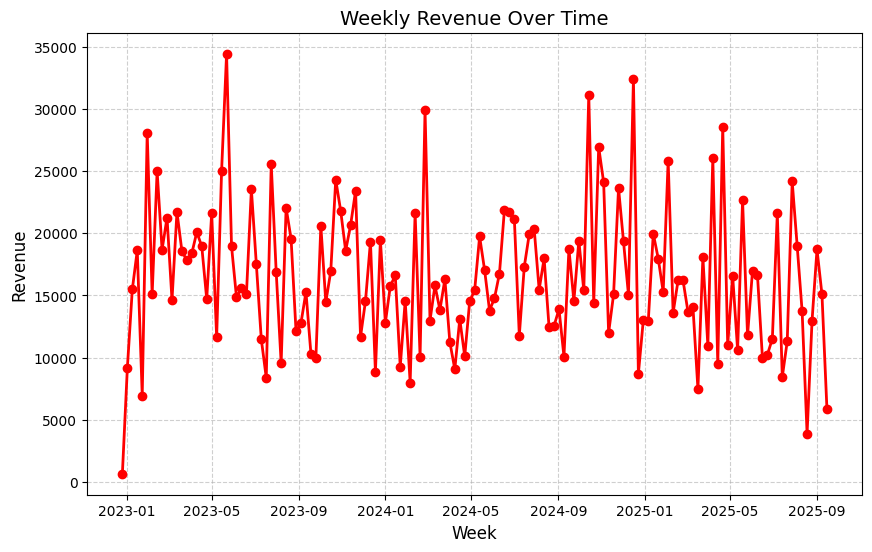

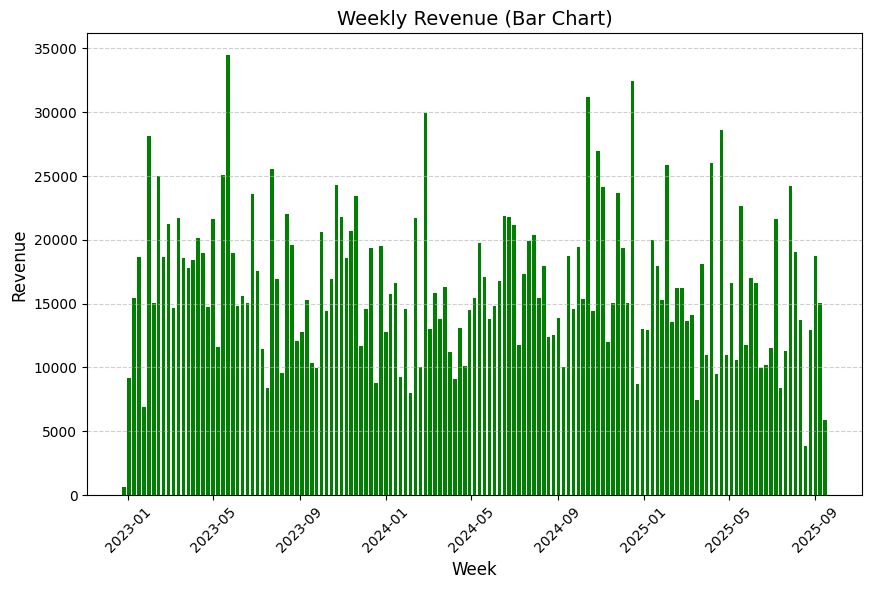

In [ ]:
# Ensure Date column is in datetime format
df_sales['OrderDate'] = pd.to_datetime(df_sales['OrderDate'])

# Group by Week-Year and calculate total revenue
weekly_revenue = df_sales.groupby(df_sales['OrderDate'].dt.to_period('W'))['TotalINR'].sum()

# Convert PeriodIndex to Timestamp for plotting
weekly_revenue.index = weekly_revenue.index.to_timestamp()

# ---- Line Chart ----
plt.figure(figsize=(10,6))
plt.plot(weekly_revenue.index, weekly_revenue.values, marker='o',color='red', linewidth=2)
plt.title("Weekly Revenue Over Time", fontsize=14)
plt.xlabel("Week", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# ---- Bar Chart ----
plt.figure(figsize=(10,6))
plt.bar(weekly_revenue.index, weekly_revenue.values,color='green',width=5)  # width=5 for week spacing
plt.title("Weekly Revenue (Bar Chart)", fontsize=14)
plt.xlabel("Week", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.show()




---


###Plot 2

Now well try to visualize the overall sales over all the Book Categories, and infer about what Type of Book is best selling.

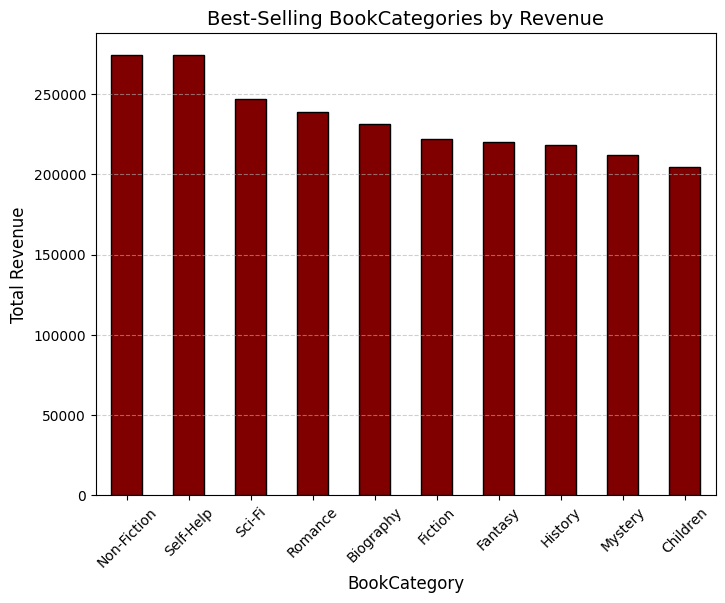

In [ ]:
#Group by Book Category and sum the revenue
bookcategory_revenue= df_sales.groupby('BookCategory')['TotalINR'].sum().sort_values(ascending=False)

# Plot bar chart

plt.figure(figsize=(8,6))
bookcategory_revenue.plot(kind='bar', color='maroon', edgecolor='black')

plt.title("Best-Selling BookCategories by Revenue", fontsize=14)
plt.xlabel("BookCategory", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.show()

###Now Explain which of the category has done the biggest contribution to the revenue

Revenue contribution by category:
  BookCategory   TotalINR
6  Non-Fiction  274537.60
9    Self-Help  274209.62
8       Sci-Fi  246780.04
7      Romance  239192.58
0    Biography  231489.71
3      Fiction  222045.07
2      Fantasy  220398.59
4      History  218228.19
5      Mystery  211869.63
1     Children  204920.21


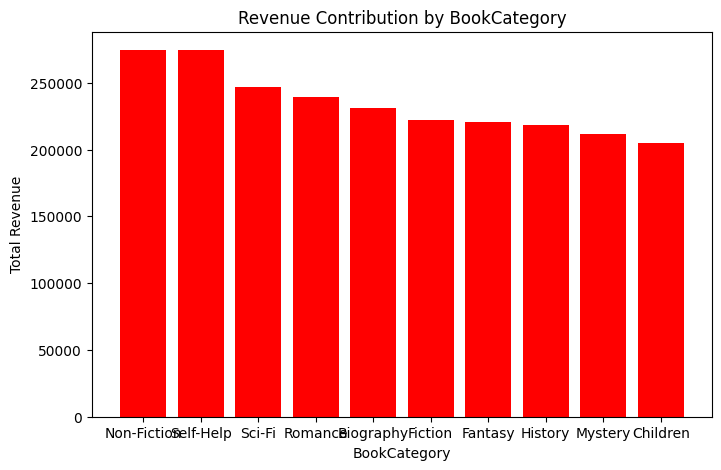

In [ ]:
# Group by BookProduct Category and calculate total revenue
bookcategory_revenue = df_sales.groupby("BookCategory")["TotalINR"].sum().reset_index()

# Sort in descending order
bookcategory_revenue =bookcategory_revenue.sort_values(by="TotalINR", ascending=False)

# Display result
print("Revenue contribution by category:")
print(bookcategory_revenue)

# Plot a bar chart
plt.figure(figsize=(8, 5))
plt.bar(bookcategory_revenue["BookCategory"], bookcategory_revenue["TotalINR"],color="red")
plt.title("Revenue Contribution by BookCategory")
plt.xlabel("BookCategory")
plt.ylabel("Total Revenue")
plt.show()


###Bar-Chart

Best-Selling Store Location According to Revenue

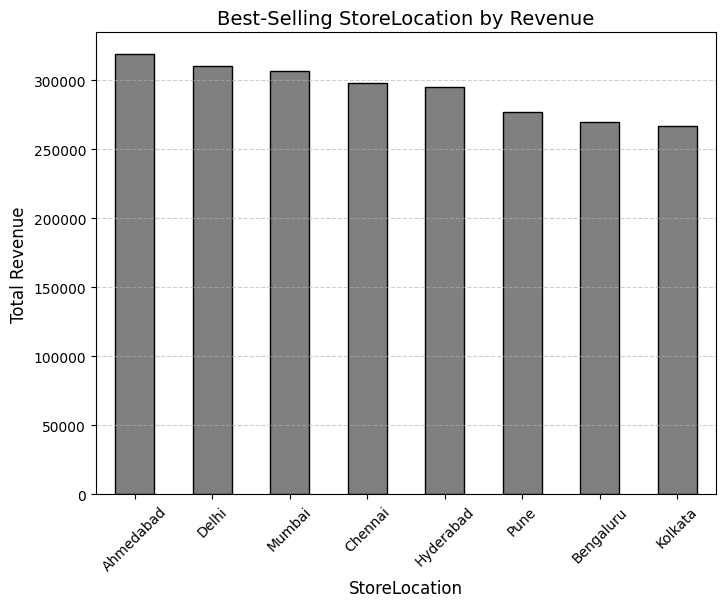

In [ ]:
# Best-Selling Storelocation and sum the revenue
storelocation_revenue= df_sales.groupby('StoreLocation')['TotalINR'].sum().sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(8,6))
storelocation_revenue.plot(kind='bar', color='gray', edgecolor='black')

plt.title("Best-Selling StoreLocation by Revenue", fontsize=14)
plt.xlabel("StoreLocation", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.show()

###Bar Chart

Transaction Process of Customer According to Revenue

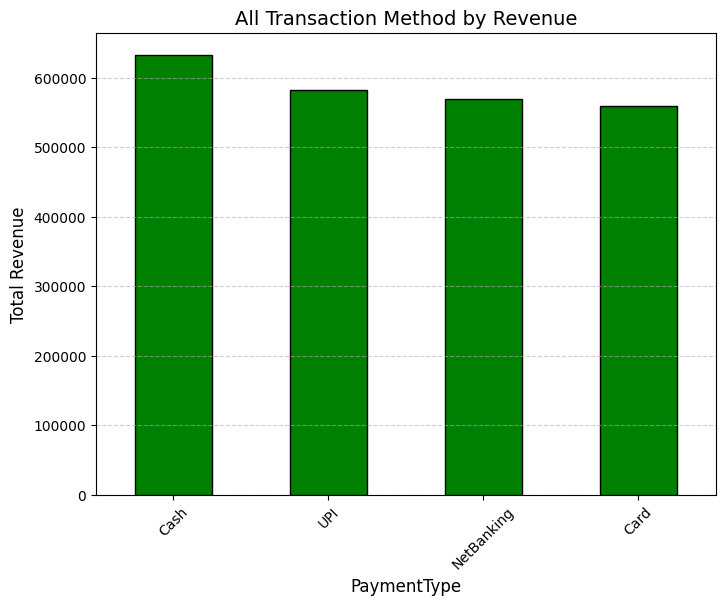

In [ ]:
#Group by PaymentType and sum the revenue
paymenttype_revenue= df_sales.groupby('PaymentType')['TotalINR'].sum().sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(8,6))
paymenttype_revenue.plot(kind='bar', color='green', edgecolor='black')

plt.title("All Transaction Method by Revenue", fontsize=14)
plt.xlabel("PaymentType", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.show()



---

**Top 5 customers** by total spending with Bar Chart  

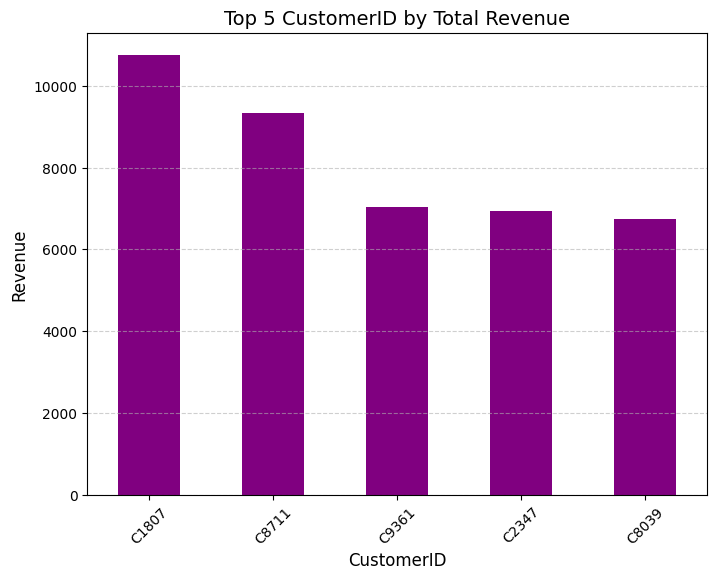

In [ ]:
# Group by Top-5 customer and sum
top_customers = df_sales.groupby('CustomerID')['TotalINR'].sum().sort_values(ascending=False).head(5)


# ---- Bar Chart ----
plt.figure(figsize=(8,6))
top_customers.plot(kind="bar", color="purple")
plt.title("Top 5 CustomerID by Total Revenue", fontsize=14)
plt.xlabel("CustomerID", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.show()

Calculating the average order value (**AOV**) per customer and plotting them with a suitable diagram. Which customers have unusually high **AOVs**

/tmp/ipython-input-3338788479.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  aov_per_customers = df_sales.groupby('CustomerID').apply(lambda x:x['TotalINR'].sum()/len(x)).sort_values(ascending=False)


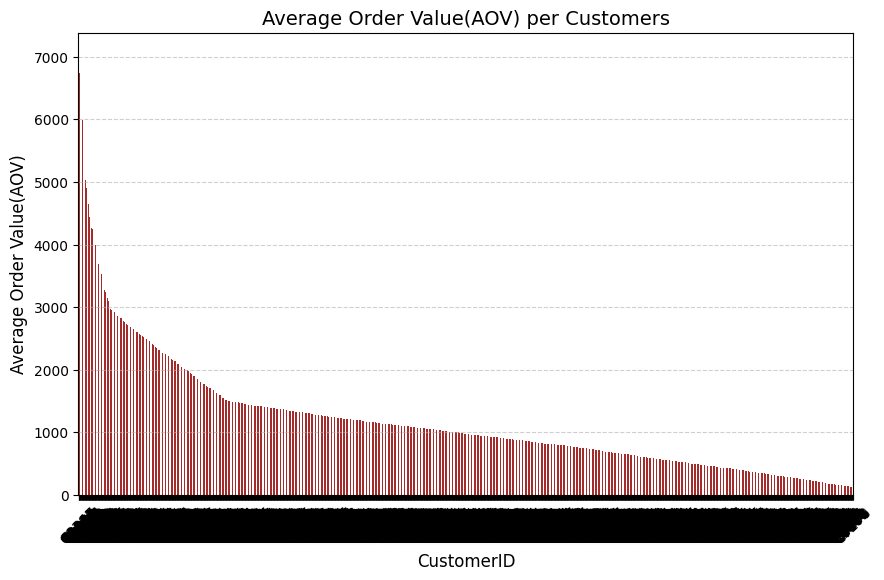

In [ ]:
# Calculatind the average order value (AOV) per customer and plotting
aov_per_customers = df_sales.groupby('CustomerID').apply(lambda x:x['TotalINR'].sum()/len(x)).sort_values(ascending=False)


# ---- Plot ----
plt.figure(figsize=(10,6))
aov_per_customers.plot(kind="bar", color="brown")
plt.title("Average Order Value(AOV) per Customers", fontsize=14)
plt.xlabel("CustomerID", fontsize=12)
plt.ylabel("Average Order Value(AOV)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.show()



---


###Plot 3




**Donut Chart** of revenue contributions by **BookCategory**

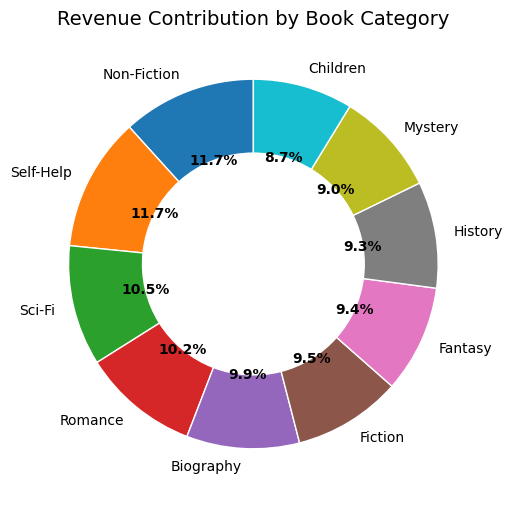

In [ ]:
# Donut chart
plt.figure(figsize=(8,6))
wedges, texts, autotexts = plt.pie(
    bookcategory_revenue['TotalINR'], # Use the numerical revenue column
    labels=bookcategory_revenue['BookCategory'], # Use the category names as labels
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops=dict(width=0.4, edgecolor='w')
)

# Formatting
plt.setp(autotexts, size=10, weight="bold", color="black")
plt.title("Revenue Contribution by Book Category", fontsize=14)
plt.show()

###Donut Chart

Revenue contribution By **Store Location**

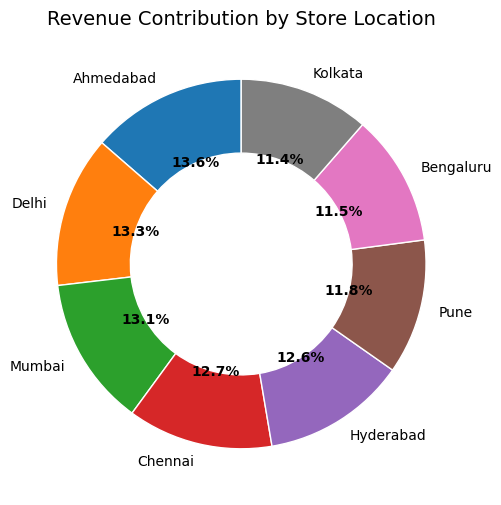

In [ ]:
# Donut chart-Revenue Contribution By Store Location
plt.figure(figsize=(8,6))
wedges, texts, autotexts = plt.pie(
    storelocation_revenue,
    labels=storelocation_revenue.index,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops=dict(width=0.4, edgecolor='w')
)

# Formatting
plt.setp(autotexts, size=10, weight="bold", color="black")
plt.title("Revenue Contribution by Store Location", fontsize=14)
plt.show()

###Donut Chart

Revenue contribution By **Transaction Metheod**

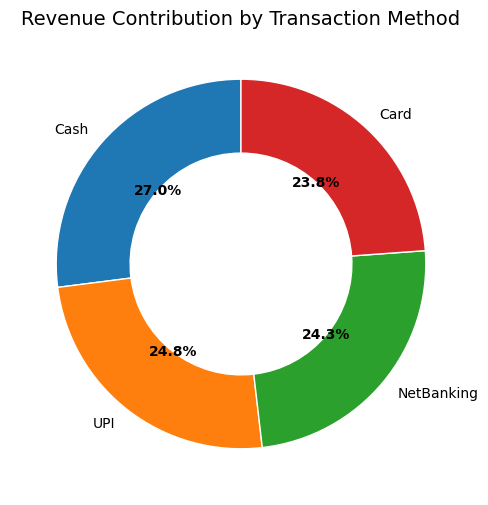

In [ ]:
# Donut chart- Revenue Contribution by Transaction Method
plt.figure(figsize=(8,6))
wedges, texts, autotexts = plt.pie(
    paymenttype_revenue,
    labels=paymenttype_revenue.index,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops=dict(width=0.4, edgecolor='w')
)

# Formatting
plt.setp(autotexts, size=10, weight="bold", color="black")
plt.title("Revenue Contribution by Transaction Method", fontsize=14)
plt.show()




---

##Task:
Plotting a **Cumulative Revenue** line chart.

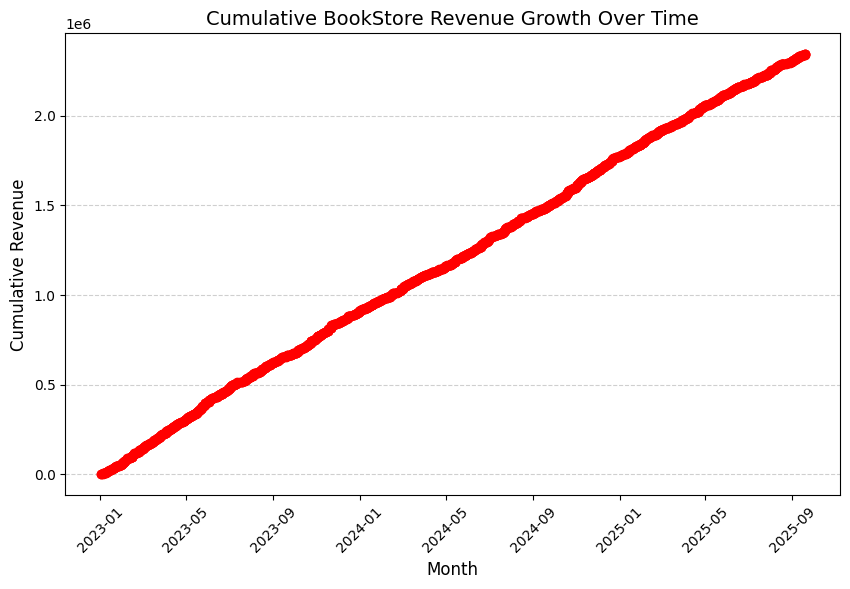

In [ ]:
#Comulative Book Store Revenue Growth Over Time Graph
df_sales['OrderDate'] = pd.to_datetime(df_sales['OrderDate'])
df_sales = df_sales.sort_values('OrderDate').reset_index(drop=True)


df_sales['Cumulative Revenue'] = df_sales['TotalINR'].cumsum()

plt.figure(figsize=(10,6))
plt.plot(df_sales['OrderDate'], df_sales['Cumulative Revenue'],color='red',marker='o', linewidth=2)
plt.title("Cumulative BookStore Revenue Growth Over Time", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Cumulative Revenue", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.show()
